In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
calendar_final = pd.read_csv('calendar_final.csv')
calendar_final

,Unnamed: 0,ds,y
0,0,2017-01-01,201.552956
1,1,2017-01-02,164.727980
2,2,2017-01-03,151.504622
3,3,2017-01-04,145.545741
4,4,2017-01-05,142.318020
...,...,...,...
1821,1821,2021-12-27,181.956220
1822,1822,2021-12-28,183.071290
1823,1823,2021-12-29,183.354279
1824,1824,2021-12-30,185.625613


In [3]:
model = Prophet()
model.fit(calendar_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
calendar_final.tail()

,Unnamed: 0,ds,y
1821,1821,2021-12-27,181.956220
1822,1822,2021-12-28,183.071290
1823,1823,2021-12-29,183.354279
1824,1824,2021-12-30,185.625613
1825,1825,2021-12-31,188.902854


In [8]:
future_df = model.make_future_dataframe(periods=730)
future_df

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
...,...
2551,2023-12-27
2552,2023-12-28
2553,2023-12-29
2554,2023-12-30


In [9]:
predictions = model.predict(future_df)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,154.632392,149.573900,164.966575,154.632392,154.632392,2.491150,2.491150,2.491150,-1.046666,-1.046666,-1.046666,3.537816,3.537816,3.537816,0.0,0.0,0.0,157.123542
1,2017-01-02,154.648089,148.065213,163.033692,154.648089,154.648089,0.894299,0.894299,0.894299,-1.439274,-1.439274,-1.439274,2.333573,2.333573,2.333573,0.0,0.0,0.0,155.542388
2,2017-01-03,154.663786,146.231681,161.138951,154.663786,154.663786,-0.821411,-0.821411,-0.821411,-1.842741,-1.842741,-1.842741,1.021330,1.021330,1.021330,0.0,0.0,0.0,153.842375
3,2017-01-04,154.679483,145.464182,160.068440,154.679483,154.679483,-2.114205,-2.114205,-2.114205,-1.733430,-1.733430,-1.733430,-0.380774,-0.380774,-0.380774,0.0,0.0,0.0,152.565278
4,2017-01-05,154.695180,143.090006,158.712851,154.695180,154.695180,-3.636557,-3.636557,-3.636557,-1.783639,-1.783639,-1.783639,-1.852918,-1.852918,-1.852918,0.0,0.0,0.0,151.058623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,183.260084,159.015711,221.152102,154.428391,215.060210,5.978629,5.978629,5.978629,-1.733430,-1.733430,-1.733430,7.712059,7.712059,7.712059,0.0,0.0,0.0,189.238713
2552,2023-12-28,183.268506,159.841486,220.596314,154.362054,215.149296,5.577566,5.577566,5.577566,-1.783639,-1.783639,-1.783639,7.361205,7.361205,7.361205,0.0,0.0,0.0,188.846072
2553,2023-12-29,183.276928,163.368615,226.562600,154.295718,215.238383,10.533800,10.533800,10.533800,3.687618,3.687618,3.687618,6.846182,6.846182,6.846182,0.0,0.0,0.0,193.810728
2554,2023-12-30,183.285350,163.615393,226.044456,154.241658,215.327470,10.328024,10.328024,10.328024,4.158131,4.158131,4.158131,6.169893,6.169893,6.169893,0.0,0.0,0.0,193.613374


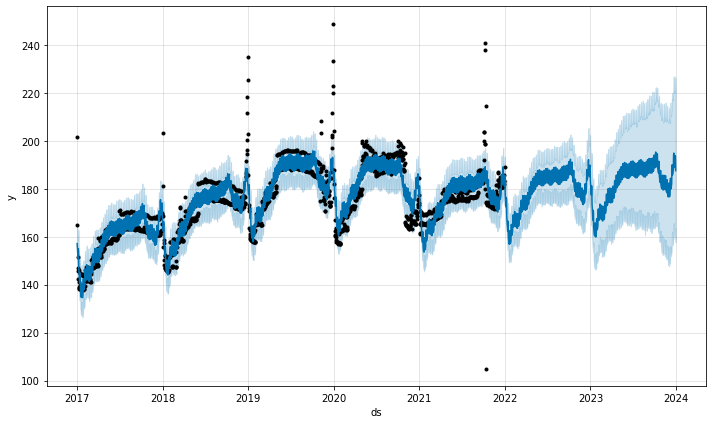

In [11]:
all_year = model.plot(predictions)

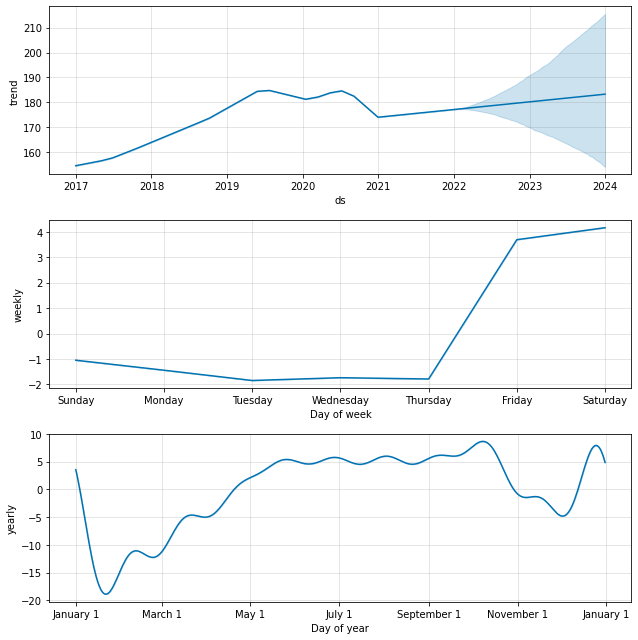

In [12]:
components = model.plot_components(predictions)

In [13]:
metric_df = predictions.set_index('ds')[['yhat']].join(calendar_final.set_index('ds').y).reset_index()

In [14]:
metric_df.tail()

,ds,yhat,y
2551,2023-12-27,189.238713,NaN
2552,2023-12-28,188.846072,NaN
2553,2023-12-29,193.810728,NaN
2554,2023-12-30,193.613374,NaN
2555,2023-12-31,187.585412,NaN


In [15]:
metric_df.dropna(inplace=True)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(metric_df.y, metric_df.yhat)

0.8163967400735124

In [18]:
mean_squared_error(metric_df.y, metric_df.yhat)

35.981767995202006

In [19]:
mean_absolute_error(metric_df.y, metric_df.yhat)

3.5198454966666466